## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df= pd.merge(study_results, mouse_metadata, how='left', on="Mouse ID")
# Display the data table for preview
mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
print(mouse_study_df['Mouse ID'].unique())
print(len(mouse_study_df['Mouse ID'].unique()))

['b128' 'f932' 'g107' 'a457' 'c819' 'h246' 'p189' 'n923' 'q119' 'f993'
 'z234' 'b559' 'y260' 'x930' 'o725' 'z969' 'v835' 'r604' 'n304' 'l700'
 'x336' 'l725' 'm133' 'v295' 'a818' 'y601' 't724' 'k382' 'w422' 'c326'
 'c139' 'v339' 'a577' 'y163' 'k483' 'k804' 'o809' 'z581' 'a251' 'i386'
 'c580' 'q132' 'u327' 'v603' 'f278' 'g497' 'd474' 'o973' 'c832' 'o331'
 'm650' 'v289' 'm550' 'h428' 'r701' 'v199' 'x264' 'f234' 'c458' 'q610'
 'j913' 'a411' 'a444' 'd251' 'j989' 'y449' 'k403' 'c758' 'x402' 'r811'
 'a644' 'i177' 'g791' 'a520' 'u196' 'm546' 'w678' 'n364' 's508' 'e662'
 'z578' 'r921' 'a492' 'w540' 'v764' 'z795' 'e291' 'e584' 'e213' 'j755'
 's565' 'a366' 'p387' 'b879' 'i901' 'k862' 'g867' 's619' 'w697' 'j984'
 'c402' 'h333' 'k510' 'p981' 't451' 'a963' 'm269' 'g989' 'z314' 'o848'
 'v719' 'q597' 'c895' 'a203' 'f394' 'c264' 'n967' 'f545' 'k894' 'k754'
 'g296' 'd164' 'w575' 'x613' 'q633' 'b313' 'f129' 'j365' 'p136' 'c559'
 'a788' 's337' 'q511' 'm331' 'o926' 'd133' 'n630' 'a401' 'w350' 'c302'
 'a897

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_no_dup = mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
mouse_no_dup

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_no_dup

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_clean_df = mouse_study_df.loc[mouse_study_df['Mouse ID'] != 'g989']
mouse_clean_df.tail(50)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1843,m601,45,28.430964,1,Capomulin,Male,22,17
1844,d251,45,37.311236,2,Ramicane,Female,8,19
1845,a492,45,60.122011,1,Stelasyn,Male,20,25
1846,x401,45,28.484033,0,Capomulin,Female,16,15
1847,p136,45,63.488697,2,Zoniferol,Female,5,28
1848,c559,45,61.840058,4,Zoniferol,Female,19,28
1849,s185,45,23.343598,1,Capomulin,Female,3,17
1850,i738,45,37.311846,2,Capomulin,Female,23,20
1851,i901,45,65.341811,0,Stelasyn,Male,23,29
1852,c757,45,69.042841,3,Placebo,Male,9,27


In [6]:
# Checking the number of mice in the clean DataFrame.

print(len(mouse_clean_df['Mouse ID'].unique()))

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_mean = mouse_clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
mouse_median = mouse_clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
mouse_variance = mouse_clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
mouse_std = mouse_clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
mouse_sem = mouse_clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mouse_stats_df = pd.DataFrame({"Tumor Mean": mouse_mean, "Tumor Median": mouse_median,
                              "Tumor Variance": mouse_variance, "Tumor Std": mouse_std,
                              "Tumor SEM": mouse_sem})
mouse_stats_df

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Std,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_summary_df = mouse_clean_df.groupby('Drug Regimen').describe().iloc[:,8:15]

# This method produces everything in a single groupby function

mouse_summary_df

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  148.0  52.320930  6.622085  45.000000  46.894328   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                    
                    50%        75%  
Drug Regimen                        
Capomulin     41.557809  45.000000  
Ceftamin      51.776157  56.801438  
Infubinol     51.820584  57.314444  
Ketapril      53.698743  60.870951  
Naftisol      52.509285  59.963034  
Placebo       52.288934  59.916934  
Propriva      50.446266  56.491585  
Ramicane      40.673236  45.000000  
Stelasyn      52.431737  58.719297  
Zoniferol     51.818479  57.954259

## Bar and Pie Charts

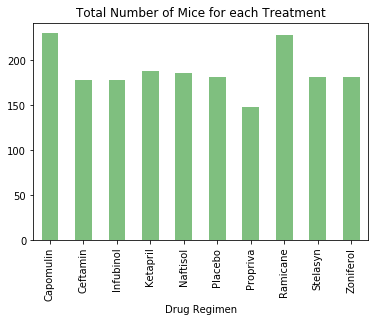

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_treatment_df = mouse_summary_df.iloc[:,0]
mice_per_treatment_df.plot(kind='bar', title='Total Number of Mice for each Treatment', color='g', alpha=.5)

([<matplotlib.axis.XTick at 0x7f8e108f3898>,
 <a list of 10 Text xticklabel objects>)

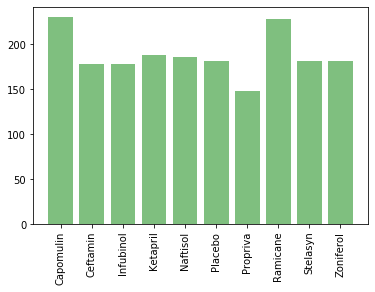

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#converting to a list to 
drugs = mouse_summary_df.reset_index().iloc[:,0].to_list()

x_axis = np.arange(len(drugs))
plt.bar(x_axis,mice_per_treatment_df, color = 'g', alpha = .5)
#mice_per_treatment_df.set_xlabel("Drug Regimen")
#mice_per_treatment_df.set_ylabel("Frequency")
plt.xticks(x_axis,['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane',
                   'Stelasyn', 'Zoniferol'], rotation = 'vertical')

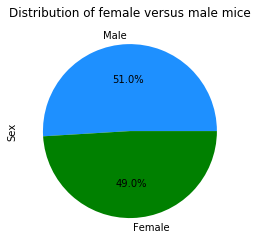

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
female_male=mouse_clean_df['Sex'].value_counts()

colors = ['dodgerblue','green']

female_male.plot(kind='pie',autopct='%1.1f%%',title='Distribution of female versus male mice',
                 colors = colors, shadow=False)
plt.show()

/Users/davidruppel/opt/anaconda3/envs/bcs/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


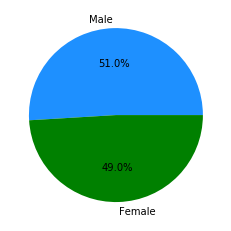

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = female_male.reset_index().iloc[:,0]

# The values of each section of the pie chart
sizes = [female_male.reset_index().iloc[:,1]]
colors = ['dodgerblue','green']

#actual plot
plt.pie(sizes, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = False)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_clean_df.groupby('Mouse ID').max()['Timepoint']
last_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_df = pd.merge(last_timepoint, mouse_clean_df, how = 'left', on = ['Mouse ID','Timepoint'])

mouse_tumor_vol = tumor_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

capo_df = mouse_clean_df.loc[mouse_clean_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ram_df = mouse_clean_df.loc[mouse_clean_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infub_df = mouse_clean_df.loc[mouse_clean_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceft_df = mouse_clean_df.loc[mouse_clean_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']
mouse_tumor_vol

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a262,Placebo,45,70.717621
3,a275,Ceftamin,45,62.999356
4,a366,Stelasyn,30,63.440686
...,...,...,...,...
243,z435,Propriva,10,48.710661
244,z578,Ramicane,45,30.638696
245,z581,Infubinol,45,62.754451
246,z795,Naftisol,45,65.741070


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for treatment in treatments:
    tumor_vol_df = mouse_tumor_vol.loc[mouse_tumor_vol['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    tumor_vol_data.append(tumor_df)

In [15]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = capo_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The interquartile range of tumor volume for Capomulin is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The interquartile range of tumor volume for Capomulin is: 7.314067135000002
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


In [16]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = ram_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The interquartile range of tumor volume for Ramicane is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The interquartile range of tumor volume for Ramicane is: 8.325365415000007
Values below 24.18658646249998 could be outliers.
Values above 57.48804812250001 could be outliers.


In [17]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = infub_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The interquartile range of tumor volume for Infubinol is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The interquartile range of tumor volume for Infubinol is: 10.002090667500006
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.


In [18]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = ceft_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The interquartile range of tumor volume for Ceftamin is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The interquartile range of tumor volume for Ceftamin is: 9.5930104575
Values below 32.818911426250004 could be outliers.
Values above 71.19095325625 could be outliers.


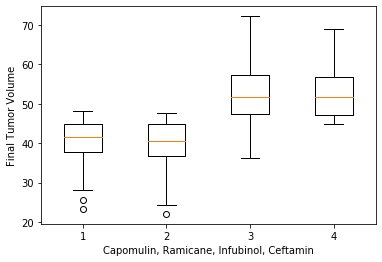

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()

ax1.set_ylabel("Final Tumor Volume")
ax1.set_xlabel("Capomulin, Ramicane, Infubinol, Ceftamin")

plt.boxplot([capo_df, ram_df, infub_df, ceft_df])
plt.show()

## Line and Scatter Plots

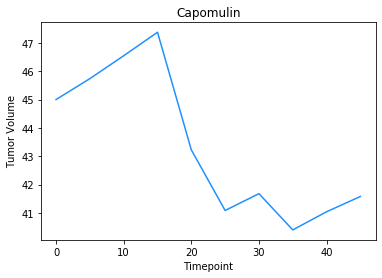

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
tumor_vol2 = mouse_clean_df.loc[mouse_clean_df["Mouse ID"]=="r944"]["Tumor Volume (mm3)"]
timepoint = mouse_clean_df.loc[mouse_clean_df["Mouse ID"]=="r944"]["Timepoint"]
plt.plot(timepoint, tumor_vol2, color="dodgerblue")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Capomulin")
plt.show()

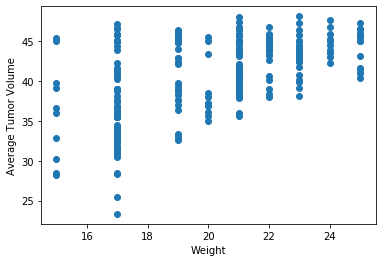

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = mouse_clean_df.loc[mouse_clean_df["Drug Regimen"]=="Capomulin"]["Weight (g)"]
avg_tumor_vol = mouse_clean_df.loc[mouse_clean_df["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]

plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")
plt.scatter(mouse_weight,avg_tumor_vol)

plt.show()

## Correlation and Regression

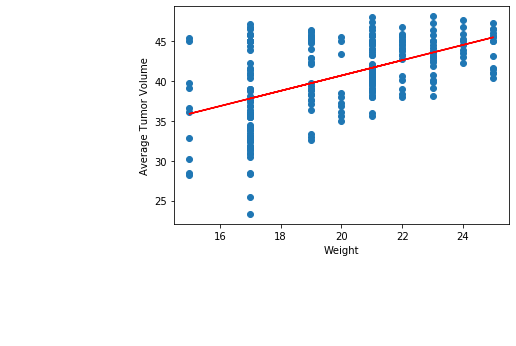

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = mouse_clean_df.loc[mouse_clean_df["Drug Regimen"]=="Capomulin"]["Weight (g)"]
avg_tumor_vol = mouse_clean_df.loc[mouse_clean_df["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]

plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor_vol)
regress_values = mouse_weight * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight,avg_tumor_vol)
plt.plot(mouse_weight,regress_values,"r-")

plt.annotate(line_eq,(9,8),fontsize=15,color="red")

plt.show()